## Assignment 33_1
### ACD MDS (Mar 2018 batch) Student: K. Anandaranga
### Time series

In [1]:
# To make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.
# Note: Done with support from https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

#### Data set to be downloaded

In [2]:
#  https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

#### Install libraries

In [3]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#### Custom function to parse the date-time field

In [4]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


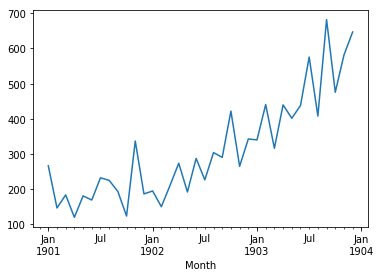

In [5]:
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

#### Plot shows a clear trend; time series is not stationary and will require differencing

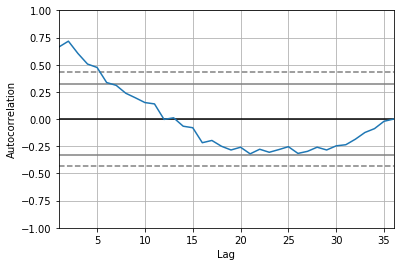

In [6]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

C:\Users\krishnam\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\krishnam\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Fri, 31 Aug 2018   AIC                            406.340
Time:                        14:55:09   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

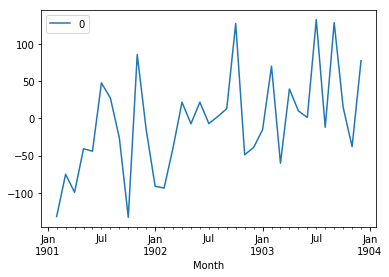

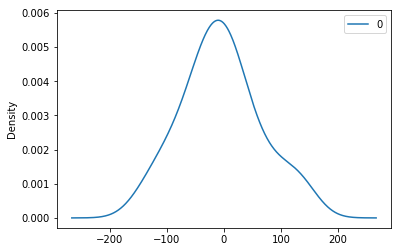

                0
count   35.000000
mean    -5.495297
std     68.132877
min   -133.296685
25%    -42.478014
50%     -7.186704
75%     24.748265
max    133.237912


In [7]:
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

#### The charts above show the following
Line plot of residual errors shows trend that is not being captured by the model <br>
Density plot of residual errors suggests that the errors are Gaussian but not centered around zero <br>
There is a Bias in the prediction

#### Rolling forecast using ARIMA model

predicted=349.117710, expected=342.300000
predicted=306.512938, expected=339.700000
predicted=387.376402, expected=440.400000
predicted=348.154245, expected=315.900000
predicted=386.308849, expected=439.300000
predicted=356.082135, expected=401.300000
predicted=446.379456, expected=437.400000
predicted=394.737380, expected=575.500000
predicted=434.915427, expected=407.600000
predicted=507.923421, expected=682.000000
predicted=435.482971, expected=475.300000
predicted=652.743782, expected=581.300000
predicted=546.343495, expected=646.900000
Test MSE: 6958.322
Model aic score 394.272628235961


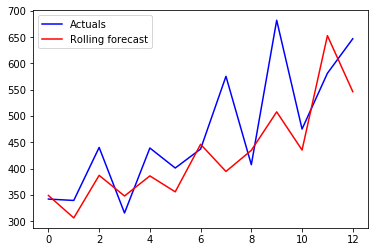

In [8]:
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

print ("Model aic score",model_fit.aic)
# plot
pyplot.plot(test,color='blue', label='Actuals')
pyplot.plot(predictions, color='red', label='Rolling forecast' )
pyplot.legend()
pyplot.show()

#### Expected value (blue line) and Rolling forecast (red line) are fairly close to each other; we can try to change the hyperparameters for a better fit

In [9]:
ararray = X

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(5):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print (x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
                        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()


(0, 1, 0) 430.87311187552797
(0, 1, 1) 409.0126622411773
(1, 1, 0) 406.02228959235015
(1, 1, 1) 402.4666524180001
(1, 1, 2) 401.5247943797664
(2, 1, 0) 403.6275641166603
(2, 1, 1) 404.28621423318384
(3, 1, 0) 404.6924591816536
(3, 1, 1) 406.1395443929499
(4, 1, 0) 404.7867685566998
(4, 1, 1) 406.57964036122064
(4, 1, 2) 400.2307795385467
Best Model is : (4, 1, 2)


#### We can now use the best model for prediction

predicted=399.145089, expected=342.300000
predicted=354.296601, expected=339.700000
predicted=429.967851, expected=440.400000
predicted=392.634577, expected=315.900000
predicted=420.191791, expected=439.300000
predicted=397.585378, expected=401.300000
predicted=487.892653, expected=437.400000
predicted=434.160075, expected=575.500000
predicted=467.057722, expected=407.600000
predicted=568.082700, expected=682.000000
predicted=468.024834, expected=475.300000
predicted=687.491507, expected=581.300000
predicted=617.839277, expected=646.900000
Test MSE: 4694.870


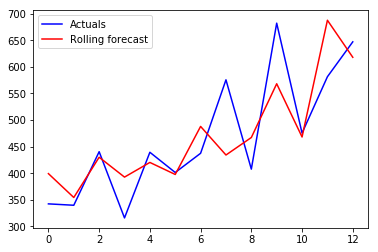

In [10]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(4,2,1))
    model_fit = model.fit(disp=1)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test,color='blue', label='Actuals')
pyplot.plot(predictions, color='red', label='Rolling forecast' )
pyplot.legend()
pyplot.show()

#### The MSE is now much reduced and the predicted values (red line) is closely tracking the actuals (blue line)